# Set up

In [ ]:
project_folder = "/content/drive/MyDrive/water_quality_predictor"

from google.colab import drive
drive.mount('/content/drive')

%cd "{project_folder}"
!git pull

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/water_quality_predictor
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 301 bytes | 1024 bytes/s, done.
From https://github.com/zalexdevon/water_quality_predictor
   8f4bf2f..b262210  main       -> origin/main
Updating 8f4bf2f..b262210
Fast-forward
 run.py | 3 ++-
 1 file changed, 2 insertions(+), 1 deletion(-)


# Cài đặt môi trường

In [ ]:
!git pull
!pip install -r requirements.txt

Updating 6ee5793..8f4bf2f
error: Your local changes to the following files would be overwritten by merge:
	src/classifier/components/data_correction.py
	src/classifier/components/data_transformation.py
	src/classifier/components/data_transformation_batch.py
	src/classifier/components/data_transformation_batch_weighted.py
	src/classifier/components/data_transformation_weighted.py
	src/classifier/config/configuration.py
	src/classifier/data_correction_code/dc3_new2.py
	src/classifier/entity/config_entity.py
Please commit your changes or stash them before you merge.
Aborting
Obtaining file:///content/drive/MyDrive/water_quality_predictor (from -r requirements.txt (line 17))
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

# Thư viện

In [ ]:
import pandas as pd
import numpy as np
from Mylib import myfuncs
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import plotly.express as px
import re
import os
from plotly.subplots import make_subplots

np.set_printoptions(suppress=True)

# Load dữ liệu

In [ ]:
df = myfuncs.load_python_object("artifacts/data_correction_dc1/data.pkl")
train_features = myfuncs.load_python_object("artifacts/data_transformation_dt1/train_features.pkl")
train_target = myfuncs.load_python_object("artifacts/data_transformation_dt1/train_target.pkl")

# Kiểm tra min, max cột numeric

In [ ]:
numeric_cols = myfuncs.get_numeric_cols_from_df_54(df)

df[numeric_cols].describe().loc[['min', 'max']].T

,min,max
pH_num,2.711180e+00,12.891960
Iron_num,7.450003e-40,14.430136
Nitrate_num,4.212227e-01,56.224636
Chloride_num,3.321329e+01,1430.548828
Lead_num,0.000000e+00,2.872971
Zinc_num,1.900000e-06,28.368671
Turbidity_num,2.560000e-13,18.778917
Fluoride_num,7.110000e-05,11.471329
Copper_num,5.410000e-08,11.390555
Odor_num,1.100125e-02,4.141903


Cột Air_Temperature_num có giá trị âm

# Kiểm tra phân bố trong các cột numeric

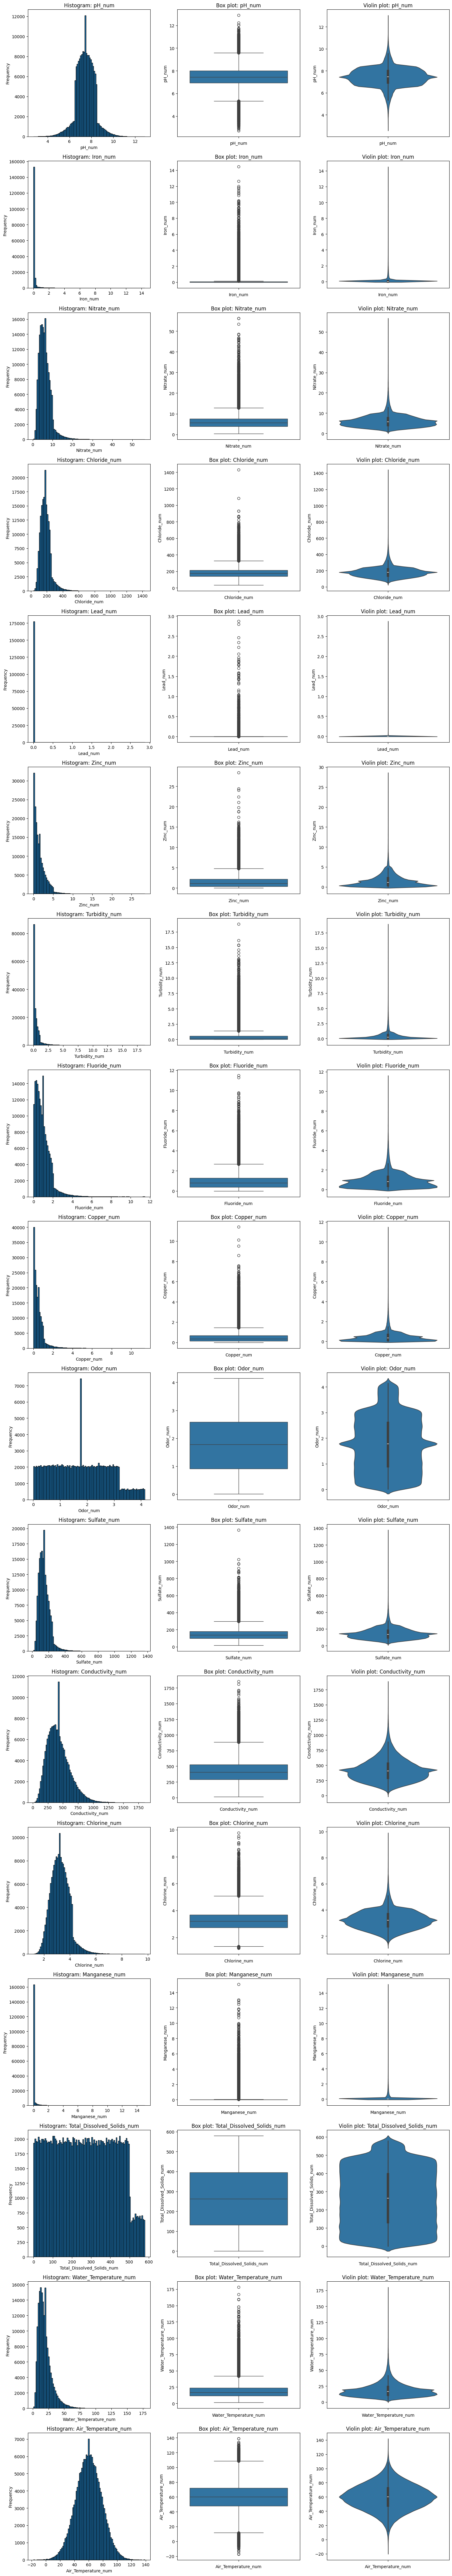

In [ ]:
fig = myfuncs.plot_hist_box_violin_plots_for_numeric_cols_matplotlib_37(df, numeric_cols)

fig.show()

cột pH_num đều

cột Iron_num lệch trên

cột Nitrate_num lệch trên

cột Chloride_num lệch trên

cột Lead_num lệch trên

cột Zinc_num lệch trên

cột Turbidity_num  lệch trên

cột Fluoride_num lệch trên

cột Copper_num lệch trên

cột Odor_num đều

cột Sulfate_num lệch trên

cột Conductivity_num đều

cột Chlorine_num đều

cột Manganese_num lệch trên

cột Total_Dissolved_Solids_num đều

cột Water_Temperature_num lệch trên

cột Air_Temperature_num đều

# Kiểm tra tương quan giữa các cột numeric

In [ ]:
myfuncs.get_correlation_between_numeric_cols_36(df, numeric_cols)

,0
"(Chloride_num, Copper_num)",0.090139
"(Turbidity_num, Copper_num)",0.088681
"(Chloride_num, Turbidity_num)",0.088165
"(Turbidity_num, Manganese_num)",0.086616
"(Copper_num, Manganese_num)",0.080768
...,...
"(Zinc_num, Conductivity_num)",0.000297
"(Total_Dissolved_Solids_num, Water_Temperature_num)",0.000260
"(Conductivity_num, Chlorine_num)",0.000136
"(Zinc_num, Air_Temperature_num)",0.000068


Hệ số tương quan nhỏ hơn < 0.09 -> các cột hoàn toàn độc lập

# Kiểm tra sự tác động của cột numeric đến cột target

In [ ]:
target_col = myfuncs.get_target_col_from_df_26(df)

myfuncs.test_relation_between_numeric_features_and_cat_target_44(df, numeric_cols, target_col)

/usr/local/lib/python3.11/dist-packages/Mylib/myfuncs.py:1791: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(cat_col)[numeric_col].apply(list)


,0
Copper_num,0.000000e+00
Iron_num,0.000000e+00
Nitrate_num,0.000000e+00
Chloride_num,0.000000e+00
Turbidity_num,0.000000e+00
Fluoride_num,0.000000e+00
Manganese_num,0.000000e+00
Odor_num,0.000000e+00
Chlorine_num,0.000000e+00
Total_Dissolved_Solids_num,9.284806e-284


Các giá trị (ngoại trừ 2 cột Conductivity_num, Water_Temperature_num) đều < 0.05 -> có tác động đến cột target

# Kiểm tra min, max cột numericcat

In [ ]:
numcat_cols = myfuncs.get_numericcat_cols_from_df_50(df)

myfuncs.get_describe_stats_for_numeric_cat_cols(df[numcat_cols])

""
min
max
median


# Kiểm tra phân bố label trong từng biến cat

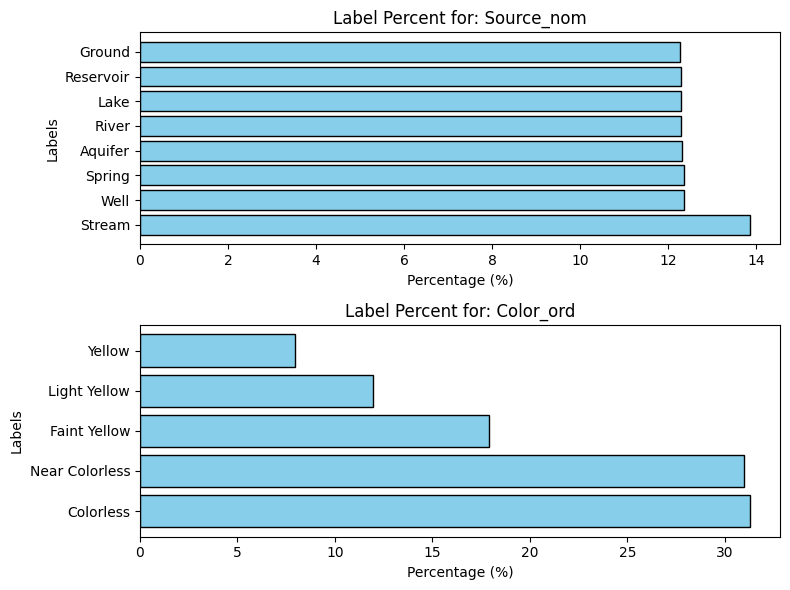

In [ ]:
cat_cols = myfuncs.get_cat_cols_from_df_49(df) + numcat_cols

fig = myfuncs.plot_label_percent_for_categorical_cols_matplotlib_38(df, cat_cols)
fig.show()

Phân bố label trong các cột đều

# Kiểm tra sự độc lập giữa các biến cat

In [ ]:
myfuncs.do_chi_square_test_for_categorical_cols_40(df, cat_cols)

/usr/local/lib/python3.11/dist-packages/Mylib/myfuncs.py:1721: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df.groupby([cat_col1, cat_col2]).size().unstack()


,0
"(Source_nom, Color_ord)",0.475368


Giá trị > 0.05 -> các cột độc lập với nhau

# Kiểm tra sự tác động của cột cat đến cột target

In [ ]:
target_col = myfuncs.get_target_col_from_df_26(df)

myfuncs.do_chi_square_test_between_categorical_cols_and_target_col_41(df, cat_cols,  target_col)

/usr/local/lib/python3.11/dist-packages/Mylib/myfuncs.py:1721: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df.groupby([cat_col1, cat_col2]).size().unstack()
/usr/local/lib/python3.11/dist-packages/Mylib/myfuncs.py:1721: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df.groupby([cat_col1, cat_col2]).size().unstack()


,0
Color_ord,0.000000
Source_nom,0.551881


Giá trị các cột (trừ cột Source_nom) < 0.05 -> các cột có tác động đến cột target